In [94]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install tensorflow
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [95]:
# PASO1. Cargar el conjunto de datos en Google Colab:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pylab as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [96]:
# Cargar el dataset
df = pd.read_csv('NYC.csv')

In [97]:
# Identificar valores faltantes en el conjunto de datos
missing_values = df.isnull().sum()
print("Valores faltantes en el conjunto de datos:")
print(missing_values)

Valores faltantes en el conjunto de datos:
id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


In [98]:
# Verificar los tipos de datos de cada columna
print("Tipos de datos de cada columna:")
print(df.dtypes)

# Estadísticas descriptivas para columnas numéricas
print("\nEstadísticas descriptivas para columnas numéricas:")
print(df.describe())

# Verificar valores únicos en columnas categóricas
print("\nValores únicos en columnas categóricas:")
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}: {df[column].unique()}")

Tipos de datos de cada columna:
id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

Estadísticas descriptivas para columnas numéricas:
        vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  177.000000       177.000000        177.000000       177.000000   
mean     1.497175         1.519774        -73.972520        40.750315   
std      0.501410         1.113402          0.039526         0.027970   
min      1.000000         1.000000        -74.016327        40.641460   
25%      1.000000         1.000000        -73.992325        40.739780   
50%      1.000000         1.000000        -73.980415        40.754196   
75%      2.000000         2.000000        -73.965881        4

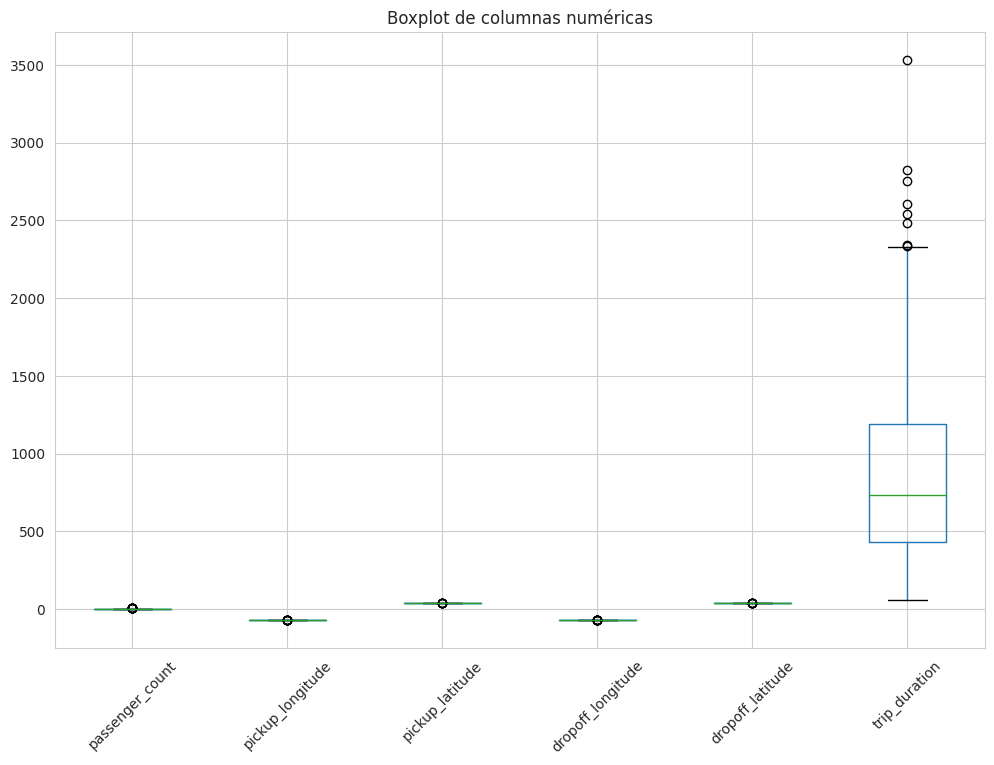

Estadísticas de resumen adicionales:
       passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
count       177.000000        177.000000       177.000000         177.000000   
mean          1.519774        -73.972520        40.750315         -73.971241   
std           1.113402          0.039526         0.027970           0.037761   
min           1.000000        -74.016327        40.641460         -74.012268   
25%           1.000000        -73.992325        40.739780         -73.992249   
50%           1.000000        -73.980415        40.754196         -73.980637   
75%           2.000000        -73.965881        40.767609         -73.961464   
max           6.000000        -73.782478        40.810726         -73.788750   

       dropoff_latitude  trip_duration  
count        177.000000     177.000000  
mean          40.751859     903.480226  
std            0.036219     633.140774  
min           40.631596      57.000000  
25%           40.732792     429.00000

In [99]:
import matplotlib.pyplot as plt

# Crear boxplots para las columnas numéricas
numerical_columns = ['passenger_count', 'pickup_longitude', 'pickup_latitude',
                     'dropoff_longitude', 'dropoff_latitude', 'trip_duration']

plt.figure(figsize=(12, 8))
df[numerical_columns].boxplot()
plt.title('Boxplot de columnas numéricas')
plt.xticks(rotation=45)
plt.show()

# Calcular estadísticas de resumen adicionales
summary_stats = df[numerical_columns].describe()
print("Estadísticas de resumen adicionales:")
print(summary_stats)

In [100]:
# unicidad de las variables categoricas
categorical = df.select_dtypes(exclude=[np.number]).columns
for cat_col in categorical:
    print(f"{cat_col} : {df[cat_col].nunique()} categorias distintas")

id : 177 categorias distintas
pickup_datetime : 177 categorias distintas
dropoff_datetime : 177 categorias distintas
store_and_fwd_flag : 1 categorias distintas


In [101]:
# unicidad de las variables continuas
numeric = df.select_dtypes(include=[np.number]).columns
for num_col in numeric:
    print(f"{num_col} : {df[num_col].nunique()} valores distintos")

vendor_id : 2 valores distintos
passenger_count : 6 valores distintos
pickup_longitude : 176 valores distintos
pickup_latitude : 175 valores distintos
dropoff_longitude : 176 valores distintos
dropoff_latitude : 177 valores distintos
trip_duration : 171 valores distintos


In [102]:
df.drop("id",axis=1,inplace=True)

In [103]:
df.isnull().sum()

vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [104]:
df.dropna(inplace=True)

<Axes: xlabel='passenger_count'>

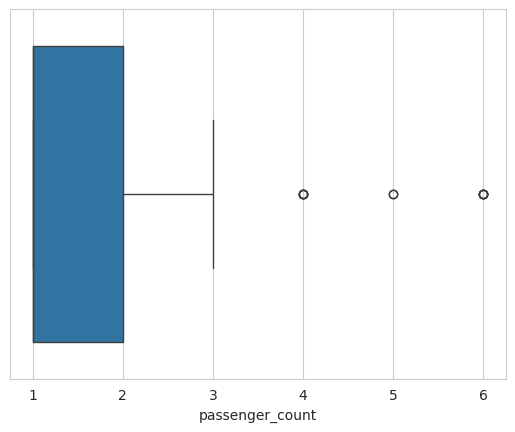

In [105]:
sns.boxplot(data=df,x="passenger_count")

In [106]:
iqr = df["passenger_count"].quantile(0.75) - df["passenger_count"].quantile(0.25)

upper_limit = df["passenger_count"].quantile(0.75) + 1.5 * iqr
lower_limit = df["passenger_count"].quantile(0.25) - 1.5 * iqr
print(upper_limit, lower_limit)

3.5 -0.5


In [107]:
upper_limit = 4
lower_limit = 1
df["passenger_count"] = np.where(df["passenger_count"]<upper_limit,df["passenger_count"],upper_limit)

In [108]:
data_numeric = df.select_dtypes(include=[np.number])

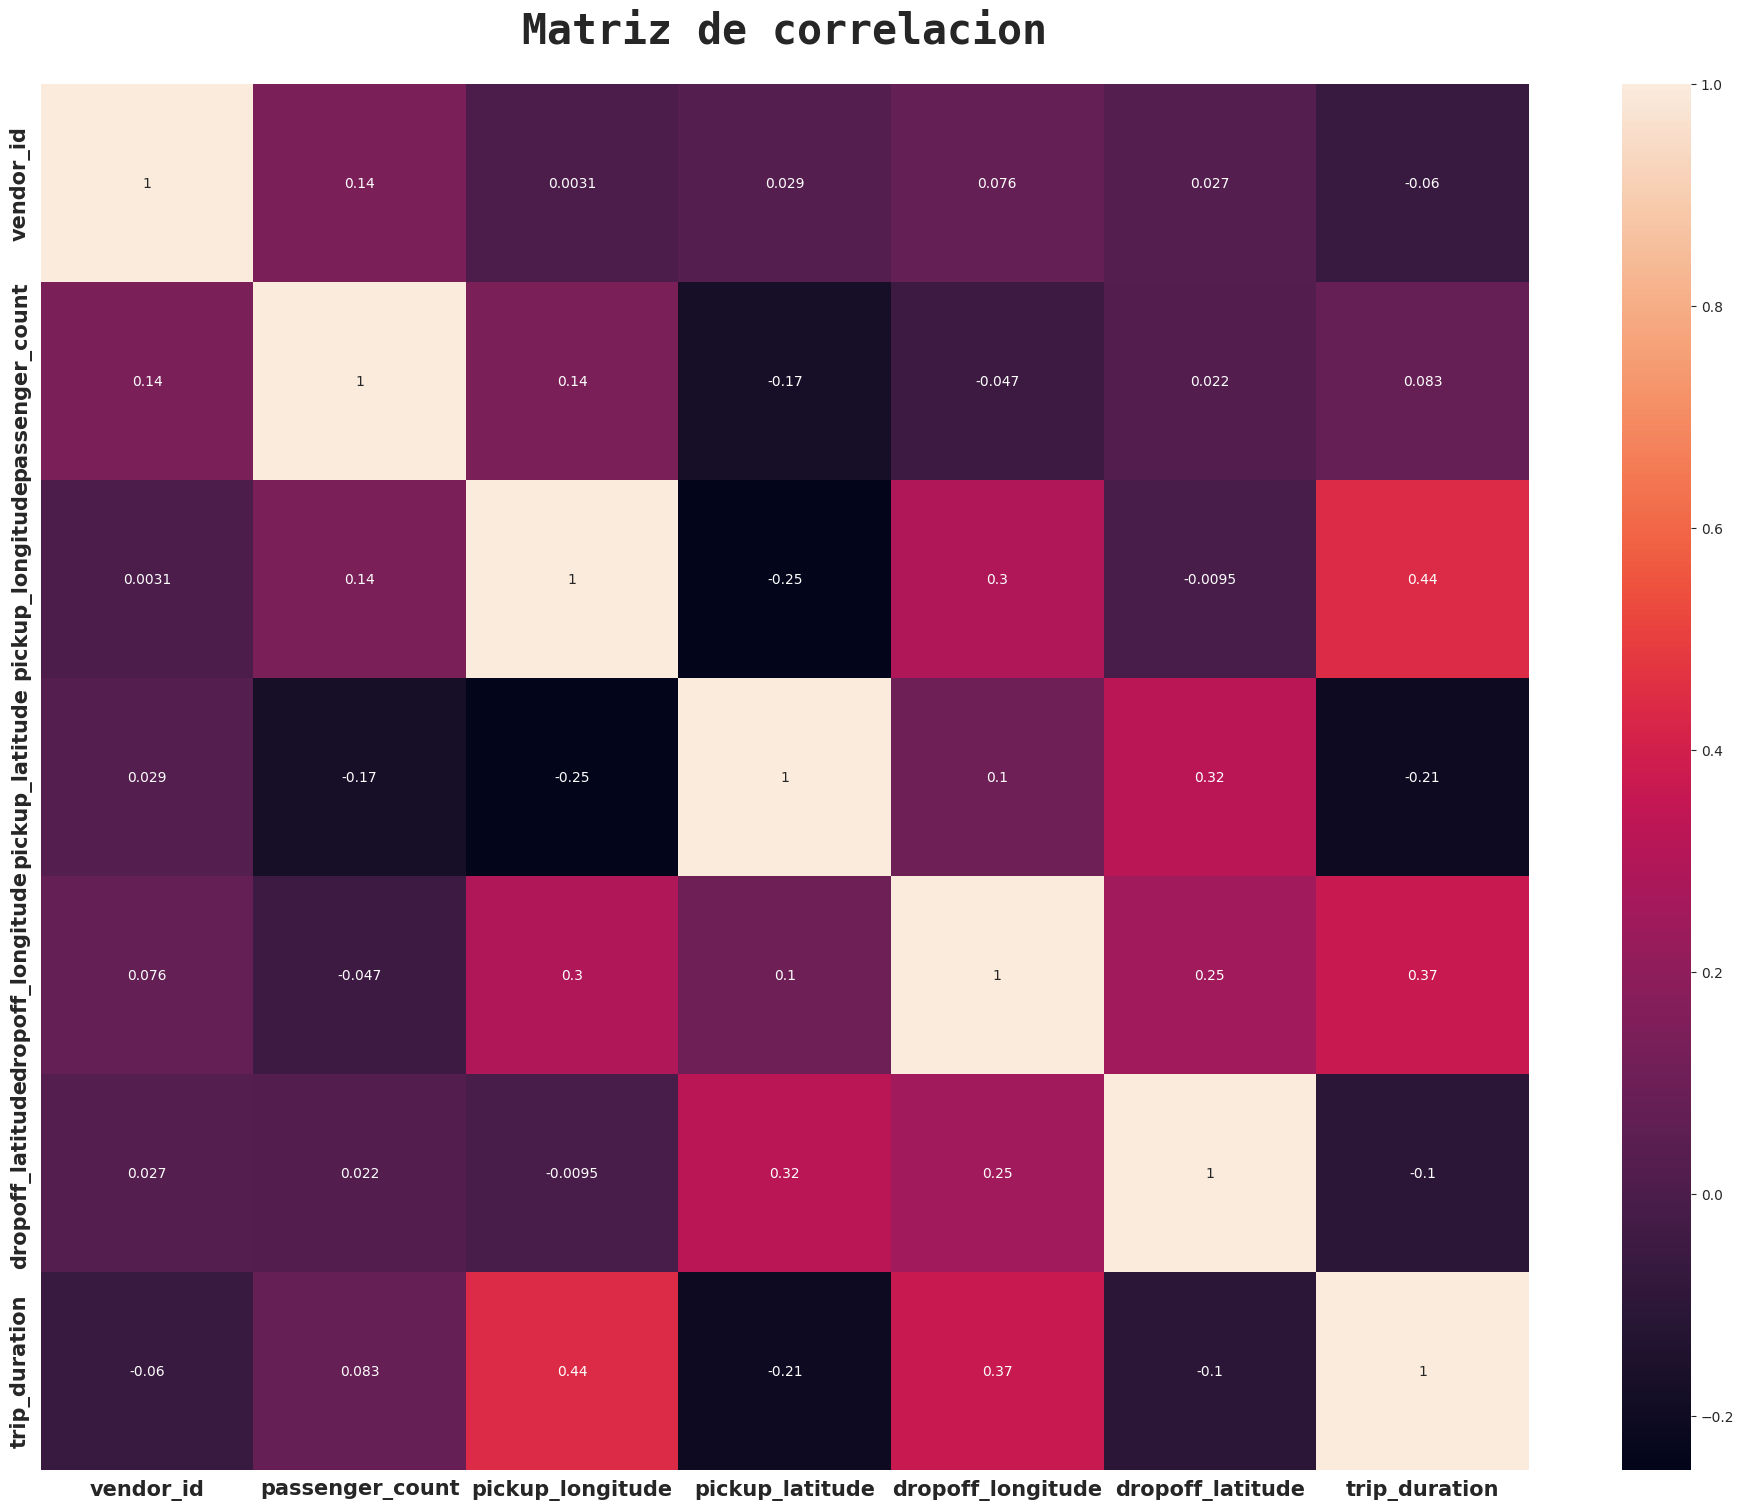

In [109]:
# matriz de correlacion
sns.set_style("whitegrid")
plt.figure(figsize=(24, 18))
sns.heatmap(data_numeric.corr(), annot=True) # mapa de calor
plt.title("Matriz de correlacion", weight="bold", fontsize=30, fontname="monospace", pad=30) # titulo
plt.xticks(weight="bold", fontsize=15) # x-eje
plt.yticks(weight="bold", fontsize=15); # y-eje

In [110]:
df[["pickup_ymd", "pickup_hms"]] = df["pickup_datetime"].str.split(" ", expand=True) # pickup datetime
df[["dropoff_ymd", "dropoff_hms"]] = df["dropoff_datetime"].str.split(" ", expand=True) # dropoff datetime

del df["pickup_datetime"]
del df["dropoff_datetime"]

df[["pickup_year", "pickup_month", "pickup_day"]] = df["pickup_ymd"].str.split("-", expand=True).astype("int") # dividir pickup
df[["pickup_hour", "pickup_minute", "pickup_second"]] = df["pickup_hms"].str.split(":", expand=True).astype("int") # dividir pickup

del df["pickup_hms"]

df[["dropoff_year", "dropoff_month", "dropoff_day"]] = df["dropoff_ymd"].str.split("-", expand=True).astype("int") # dividir dropoff
df[["dropoff_hour", "dropoff_minute", "dropoff_second"]] = df["dropoff_hms"].str.split(":", expand=True).astype("int") # dividir dropoff

del df["dropoff_ymd"]
del df["dropoff_hms"]

df.head(2)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_ymd,pickup_year,...,pickup_day,pickup_hour,pickup_minute,pickup_second,dropoff_year,dropoff_month,dropoff_day,dropoff_hour,dropoff_minute,dropoff_second
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,2016,...,14,17,24,55,2016,3,14,17,32,30
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,2016,...,12,0,43,35,2016,6,12,0,54,38


In [111]:
df_sorted_1 = df.sort_values("passenger_count", ascending=True)
df_sorted_1.head(5)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_ymd,pickup_year,...,pickup_day,pickup_hour,pickup_minute,pickup_second,dropoff_year,dropoff_month,dropoff_day,dropoff_hour,dropoff_minute,dropoff_second
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,2016,...,14,17,24,55,2016,3,14,17,32,30
98,1,1,-73.789841,40.643559,-73.970665,40.687279,N,2824,2016-03-30,2016,...,30,16,14,29,2016,3,30,17,1,33
100,1,1,-74.005028,40.746452,-73.972008,40.745781,N,1826,2016-06-01,2016,...,1,11,48,41,2016,6,1,12,19,7
101,1,1,-73.981415,40.756733,-73.970566,40.755695,N,593,2016-05-18,2016,...,18,21,9,2,2016,5,18,21,18,55
103,1,1,-73.974014,40.757153,-73.949738,40.777092,N,653,2016-03-15,2016,...,15,21,3,44,2016,3,15,21,14,37


In [112]:
df_sorted_1 = df.sort_values("passenger_count", ascending=True)
df_sorted_1.tail(5)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_ymd,pickup_year,...,pickup_day,pickup_hour,pickup_minute,pickup_second,dropoff_year,dropoff_month,dropoff_day,dropoff_hour,dropoff_minute,dropoff_second
136,2,4,-73.970284,40.764832,-73.957573,40.782478,N,474,2016-05-25,2016,...,25,13,19,56,2016,5,25,13,27,50
69,2,4,-73.978333,40.754070,-73.959732,40.772758,N,870,2016-02-03,2016,...,3,16,22,50,2016,2,3,16,37,20
143,2,4,-73.997078,40.720638,-73.999634,40.745838,N,714,2016-04-11,2016,...,11,10,44,32,2016,4,11,10,56,26
104,2,4,-73.788132,40.641460,-73.971771,40.749409,N,1884,2016-06-06,2016,...,6,20,13,56,2016,6,6,20,45,20
11,2,4,-73.991531,40.749439,-73.956543,40.770630,N,1128,2016-05-15,2016,...,15,11,16,11,2016,5,15,11,34,59


In [113]:
df = df[df["passenger_count"]!=0]
df = df[df["passenger_count"]<=6]

In [114]:
df["store_and_fwd_flag"]

0      N
1      N
2      N
3      N
4      N
      ..
172    N
173    N
174    N
175    N
176    N
Name: store_and_fwd_flag, Length: 177, dtype: object

In [115]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
store_and_fwd_flag_encoded = ohe.fit_transform(df[["store_and_fwd_flag"]])
print(ohe.categories_)

[array(['N'], dtype=object)]


In [116]:
store_and_fwd_flag_encoded

<177x1 sparse matrix of type '<class 'numpy.float64'>'
	with 177 stored elements in Compressed Sparse Row format>

In [117]:
df["Y"] = store_and_fwd_flag_encoded.toarray()
df.rename({"Y":"Yes_store_and_fwd_flag"},axis=1,inplace=True)
df.drop("store_and_fwd_flag",axis=1,inplace=True)

modelo  del analisis de datos

In [123]:
X = df.drop(['trip_duration'], axis=1)
y = df['trip_duration']

In [124]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [125]:
non_numeric_columns = X_test.select_dtypes(exclude=['float', 'int']).columns

# Now, proceed with dropping non-numeric columns from X_test
X_test_numeric = X_test.drop(columns=non_numeric_columns)

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [128]:
data = pd.read_csv('NYC.csv')

In [130]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_minute'] = data['pickup_datetime'].dt.minute
data['dropoff_hour'] = data['dropoff_datetime'].dt.hour
data['dropoff_minute'] = data['dropoff_datetime'].dt.minute

In [131]:
data = data.drop(columns=['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag'])

In [132]:
X = data.drop(columns='trip_duration')
y = data['trip_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [134]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 546.7398664872001


In [142]:
%pip install folium


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [150]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta
import folium

# Cargar los datos desde el archivo CSV
df = pd.read_csv('NYC.csv')

# Separar los datos en características (X) y variable objetivo (y)
X = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
y = df['trip_duration']

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenar el modelo de regresión
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_scaled, y)

# Interfaz de usuario interactiva
pickup_time_input = input("Introduce la hora de recogida (formato HH:MM:SS): ")
pickup_longitude_input = float(input("Introduce la longitud de recogida: "))
pickup_latitude_input = float(input("Introduce la latitud de recogida: "))
dropoff_longitude_input = float(input("Introduce la longitud de entrega: "))
dropoff_latitude_input = float(input("Introduce la latitud de entrega: "))

# Convertir la hora de recogida a un objeto datetime
pickup_datetime_input = datetime.strptime(pickup_time_input, '%H:%M:%S')

# Estimación de la duración del viaje
user_input = scaler.transform([[pickup_longitude_input, pickup_latitude_input, dropoff_longitude_input, dropoff_latitude_input]])
predicted_duration = model.predict(user_input)[0]

# Estimación de la hora de llegada
estimated_dropoff_time = pickup_datetime_input + timedelta(seconds=int(predicted_duration))

# Crear el mapa
m = folium.Map(location=[40.730610, -73.935242], zoom_start=12)

# Marcar el punto de recogida
folium.Marker(
    location=[pickup_latitude_input, pickup_longitude_input],
    popup='Punto de Recogida',
    icon=folium.Icon(color='blue')
).add_to(m)

# Marcar el punto de destino
folium.Marker(
    location=[dropoff_latitude_input, dropoff_longitude_input],
    popup='Punto de Destino',
    icon=folium.Icon(color='red')
).add_to(m)

# Mostrar el mapa
print("Estimación de la duración del viaje:", predicted_duration, "segundos")
print("Hora estimada de llegada:", estimated_dropoff_time.strftime('%H:%M:%S'))
m


Estimación de la duración del viaje: 569.87 segundos
Hora estimada de llegada: 12:56:14


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
